# HiMAP tutorial: mock community data

In [1]:
library(himap)

HiMAP v1.0 loaded.


Specify full main path and load raw FASTQ files. If ~ is not expanded, blastn breaks.

In [2]:
out_path = path.expand('~/cloud/research/microbiome/zheng-2015/tutorial')

In [3]:
fastq_path = file.path(out_path, 'fastq')
fq_fwd = read_files(fastq_path, 'R1')
fq_rev = read_files(fastq_path, 'R2')

Generate output files for the entire pipeline:

In [4]:
sample_ids = sampleids_from_filenames(fq_fwd, separator='_')
fq_mer = file.path(out_path, 'merged', paste0(sample_ids, '.fastq'))
fq_tri = file.path(out_path, 'trimmed', paste0(sample_ids, '.fastq'))
fq_fil = file.path(out_path, 'filtered', paste0(sample_ids, '.fastq'))
blast_output_file = file.path(out_path, 'blast_vs_db.txt')

## Pre-processing
Merge reads, trim PCR primers and perform quality control and final trimming.

In [5]:
mergestats = merge_pairs(fq_fwd, fq_rev, fq_mer, verbose=T)

Loading FASTQ reads... OK.
Merging pairs... OK.
Writing output files... OK.
Loading FASTQ reads... OK.
Merging pairs... OK.
Writing output files... OK.
Loading FASTQ reads... OK.
Merging pairs... OK.
Writing output files... OK.
Loading FASTQ reads... OK.
Merging pairs... OK.
Writing output files... OK.


Primer set used for amplifying V3-V4 region was 341F and 805R, which are labelled as 'V3-V4-2' in our reference table:

In [5]:
himap_option('blast_dbs')[6]

Primer1,Primer2,Primer1_sequence_5to3,Primer2_sequence_3to5,Hypervariable_region,DB,table
341F,805R,GACAGCCTACGGGNGGCWGCAG,GACTACHVGGGTATCTAATCC,V3-V4-2,V3-V4_337F-805R_hang21_wrefseq_sequences_unique_variants,V3-V4_337F-805R_hang21_wrefseq_table_unique_variants_R.txt


In [6]:
trimstats = pcr_primer_trimmer(fq_mer, fq_tri, region='V3-V4-2', verbose=T)

In [7]:
trimstats

,/Users/igor/cloud/research/microbiome/zheng-2015/tutorial/merged/V3V4Rep1.fastq,/Users/igor/cloud/research/microbiome/zheng-2015/tutorial/merged/V3V4Rep2.fastq,/Users/igor/cloud/research/microbiome/zheng-2015/tutorial/merged/V3V4Rep3.fastq,/Users/igor/cloud/research/microbiome/zheng-2015/tutorial/merged/V3V4Rep4.fastq
fwd_trim,590279,563964,573495,606141
rev_trim,589967,563557,573089,605645


In [8]:
seqlen.ft = sequence_length_table(fq_tri)
trim_length = ftquantile(seqlen.ft, 0.01)
trim_length

[1] 403

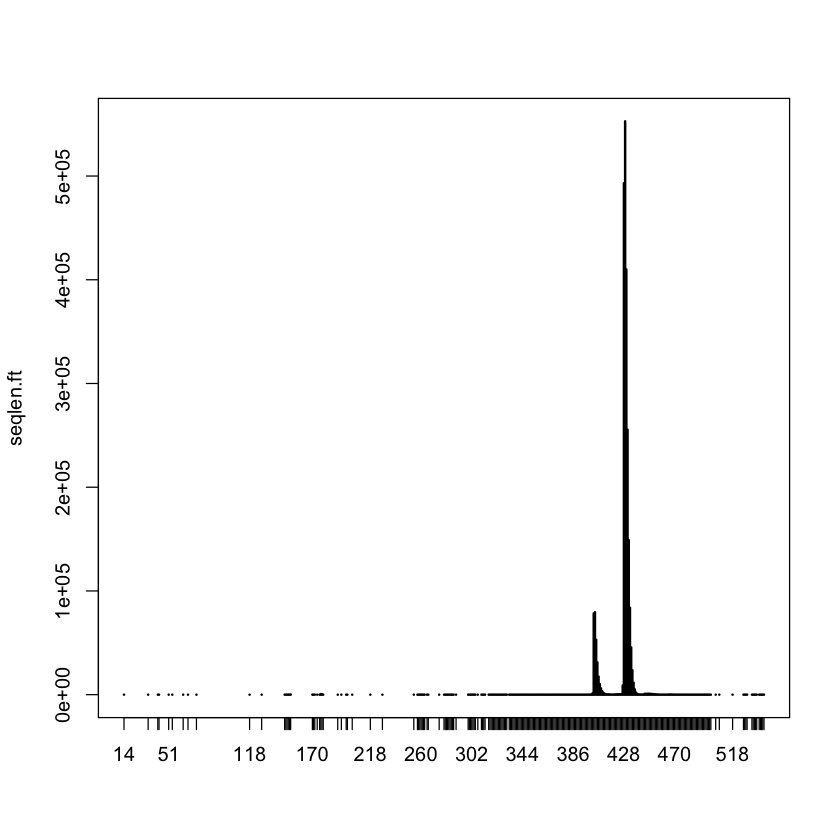

In [9]:
plot(seqlen.ft)

In [10]:
filtstats = dada2::filterAndTrim(fq_tri, fq_fil, truncLen=trim_length, maxEE=2, multithread=T, verbose=T)

Creating output directory: /Users/igor/cloud/research/microbiome/zheng-2015/tutorial/filtered


In [ ]:
dada_result = dada_denoise(fq_fil, fq_tri)
saveRDS(dada_result, file.path(out_path, 'dada_result'))

In [10]:
ab.dt = sequence_abundance(dada_result)

* generating sequence table...

ERROR: Error in class(samples) %in% c("dada", "derep", "data.frame"): object 'dada_result' not found


In [ ]:
head(ab.dt)

In [37]:
blast_output = blast(ab.dt, blast_output_file, region='V3-V4', word_size=50, max_target_seqs=500, verbose=T)

* blast input type: abundance table


ERROR: Error in blast(ab.dt, blast_output_file, region = "V3-V4", max_target_seqs = 500, : blast: error running blastn.


In [16]:
saveRDS(blast_output, file.path(out_path, 'blast_output'))

In [17]:
osu_ab.dt = abundance(ab.dt, blast_output)

OSU table: OK. Melt table:  OK.Preparing blast tables...OK.


In [33]:
osu_ab.dt

sample_id,osu_id,osu_count,pctsim,species
V3V4Rep1,1000004,136762,97.41,Streptococcus_mutans_[107]
V3V4Rep1,1000001,124088,97.88,"Staphylococcus_epidermidis_[454],Listeria_monocytogenes_[7],Staphylococcus_caprae_[3],Akkermansia_muciniphila_[2],Corynebacterium_diphtheriae_ST378-KZN-2015-45462,Mycobacterium_abscessus_massiliense_aerosol_26,Serratia_marcescens_276_SMAR,Staphylococcus_capitis_urealyticus_MAW_8436,Staphylococcus_saccharolyticus_OG2-2,Staphylococcus_sp._HMSC034D07,Staphylococcus_sp._HMSC034G11,Staphylococcus_sp._HMSC036A09,Staphylococcus_sp._HMSC055A10,Staphylococcus_sp._HMSC055B03,Staphylococcus_sp._HMSC063F03,Staphylococcus_sp._HMSC063F05,Staphylococcus_sp._HMSC064E11,Staphylococcus_sp._HMSC065D05,Staphylococcus_sp._HMSC065D11,Staphylococcus_sp._HMSC066G04,Staphylococcus_sp._HMSC067B04,Staphylococcus_sp._HMSC068G11,Staphylococcus_sp._HMSC068G12,Staphylococcus_sp._HMSC070A07,Staphylococcus_sp._HMSC072H01,Staphylococcus_sp._HMSC073C02,Staphylococcus_sp._HMSC073E10,Staphylococcus_sp._HMSC074D07,Staphylococcus_sp._HMSC074F11,Staphylococcus_sp._HMSC075A04,Staphylococcus_sp._HMSC076H12,Staphylococcus_sp._HMSC077C03,Staphylococcus_sp._HMSC077D08,Staphylococcus_sp._HMSC077D09,Staphylococcus_sp._HMSC077G12,Staphylococcus_sp._HMSC077H01,Staphylococcus_warneri_252_SWAR,Streptococcus_pneumoniae_C14249,Veillonella_atypica_CMW7756B"
V3V4Rep1,1000002,119187,97.88,Escherichia_coli_KTE211
V3V4Rep1,2508,22126,100.00,"Rhodobacter_sphaeroides_[11],Rhodobacter_johrii_JA192,Rhodobacter_megalophilus_DSM_18937,Rhodobacter_sp._AKP1"
V3V4Rep1,1000007,15884,98.35,Staphylococcus_epidermidis_[8]
V3V4Rep1,1000008,14418,98.11,Streptococcus_agalactiae_IT-NI-020
V3V4Rep1,1000009,14119,97.65,Bacillus_cereus_03BB87
V3V4Rep1,1000011,11849,98.12,Staphylococcus_aureus_[2]
V3V4Rep1,1000012,6173,97.88,Pseudomonas_aeruginosa_DQ8
V3V4Rep1,1000014,2047,99.75,"Helicobacter_pylori_[610],Klebsiella_pneumoniae_[2]"


In [19]:
osu_ab.dt[, .N, by=sample_id]

sample_id,N
V3V4Rep1,131
V3V4Rep2,161
V3V4Rep3,126
V3V4Rep4,157


In [20]:
saveRDS(osu_ab.dt, file.path(out_path, 'osu_ab.dt'))

In [23]:
library(data.table)


Attaching package: ‘data.table’

The following object is masked _by_ ‘.GlobalEnv’:

    .N



In [24]:
osu_ab.dt[species %like% 'Clostridium']

sample_id,osu_id,osu_count,pctsim,species
V3V4Rep1,2783,890,100.00,Clostridium_beijerinckii_[4]
V3V4Rep1,1000452,16,90.75,Clostridium_frigidicarnis_SPL77A
V3V4Rep2,2783,922,100.00,Clostridium_beijerinckii_[4]
V3V4Rep2,1000086,175,96.75,"Clostridium_beijerinckii_[18],Clostridium_saccharoperbutylacetonicum_[4],Clostridium_diolis_[3],Clostridium_sp._BL-8,Clostridium_sp._DL-VIII,Clostridium_sp._LS"
V3V4Rep2,1000440,19,97.99,"Clostridium_beijerinckii_[18],Clostridium_saccharoperbutylacetonicum_[4],Clostridium_diolis_[3],Clostridium_sp._BL-8,Clostridium_sp._DL-VIII,Clostridium_sp._LS"
V3V4Rep3,2783,928,100.00,Clostridium_beijerinckii_[4]
V3V4Rep4,2783,913,100.00,Clostridium_beijerinckii_[4]
V3V4Rep4,1000125,132,88.25,Clostridium_quinii_DSM_6736
V3V4Rep4,1000457,16,90.73,Clostridium_fallax_DSM_2631


In [25]:
osu_ab.dt[osu_id==2783]

sample_id,osu_id,osu_count,pctsim,species
V3V4Rep1,2783,890,100,Clostridium_beijerinckii_[4]
V3V4Rep2,2783,922,100,Clostridium_beijerinckii_[4]
V3V4Rep3,2783,928,100,Clostridium_beijerinckii_[4]
V3V4Rep4,2783,913,100,Clostridium_beijerinckii_[4]


In [28]:
blast_output$[osu_id==2783]

variant_id,copy_number,strain,strain_id,rrn_uniq,spectrum,osu_id,no_strains_in_osu,species,no_species_in_osu
00496,13,Clostridium_beijerinckii_NCIMB_8052,58532,2,"13:00496,1:00497",2783,2,Clostridium_beijerinckii,1
00497,1,Clostridium_beijerinckii_NCIMB_8052,58532,2,"13:00496,1:00497",2783,2,Clostridium_beijerinckii,1
00496,13,Clostridium_beijerinckii_ATCC_35702_SA-1,58535,2,"13:00496,1:00497",2783,2,Clostridium_beijerinckii,1
00497,1,Clostridium_beijerinckii_ATCC_35702_SA-1,58535,2,"13:00496,1:00497",2783,2,Clostridium_beijerinckii,1


In [35]:
blast_output$alignments[pctsim==100]

variant_id,qseqid,qlen,length,qstart,qend,sstart,send,slen,score,match,mismatch,gapopen,gapextend,pctsim,strain,copy_number
00309,339,419,419,1,419,25,443,465,2095,419,0,0,0,100,Bacteroides_vulgatus_ATCC_8482,1
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sphaeroides_2.4.1_2.4.1;_ATCC_BAA-808,3
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sphaeroides_WS8N,3
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sphaeroides_2.4.1,3
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sphaeroides_MBTLJ-8,3
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sphaeroides_MBTLJ-13,3
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sphaeroides_MBTLJ-20,3
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sphaeroides_ATCC_17029,4
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sphaeroides_KD131_KD131;_KCTC_12085,4
00315,5,399,399,1,399,25,423,445,1995,399,0,0,0,100,Rhodobacter_sp._AKP1,1


In [36]:
ab.dt

sample_id,qseqid,raw_count,sequence
V3V4Rep1,1,124088,GAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGATGAAGGTCTTCGGATCGTAAAACTCTGTTATTAGGGAAGAACAAATGTGTAAGTAACTATGCACGTCTTGACGGTACCTAATCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGTCATTGGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATGTGTAGCGGTGAAATGCGCAGAGATATGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGTCTGTAACTGACGCTGATGTGGGGAAAAGGGGGGGGTAAAAAAA
V3V4Rep2,1,105678,GAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGATGAAGGTCTTCGGATCGTAAAACTCTGTTATTAGGGAAGAACAAATGTGTAAGTAACTATGCACGTCTTGACGGTACCTAATCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGTCATTGGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATGTGTAGCGGTGAAATGCGCAGAGATATGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGTCTGTAACTGACGCTGATGTGGGGAAAAGGGGGGGGTAAAAAAA
V3V4Rep3,1,115852,GAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGATGAAGGTCTTCGGATCGTAAAACTCTGTTATTAGGGAAGAACAAATGTGTAAGTAACTATGCACGTCTTGACGGTACCTAATCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGTCATTGGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATGTGTAGCGGTGAAATGCGCAGAGATATGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGTCTGTAACTGACGCTGATGTGGGGAAAAGGGGGGGGTAAAAAAA
V3V4Rep4,1,129773,GAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGATGAAGGTCTTCGGATCGTAAAACTCTGTTATTAGGGAAGAACAAATGTGTAAGTAACTATGCACGTCTTGACGGTACCTAATCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGTCATTGGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATGTGTAGCGGTGAAATGCGCAGAGATATGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGTCTGTAACTGACGCTGATGTGGGGAAAAGGGGGGGGTAAAAAAA
V3V4Rep1,2,119187,GAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGGGGGGAAAAGGGGGGGGGAAAAAAA
V3V4Rep2,2,0,GAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGGGGGGAAAAGGGGGGGGGAAAAAAA
V3V4Rep3,2,112565,GAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGGGGGGAAAAGGGGGGGGGAAAAAAA
V3V4Rep4,2,118302,GAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGGGGGGAAAAGGGGGGGGGAAAAAAA
V3V4Rep1,3,0,GAATCTTCGGCAATGGACGAAAGTCTGACCGAGCAACGCCGCGTGAGTGAAGAAGGTTTTCGGATCGTAAAGCTCTGTTGTAAGTCAAGAACGTGTGTGAGAGTGGAAAGTTCACACAGTGACGGTAGCTTACCAGAAAGGGACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGGGAGCGCAGGCGGTCAGGAAAGTCTGGAGTAAAAGGCTATGGCTCAACCATAGTGTGCTCTGGAAACTGTCTGACTTGAGTGCAGAAGGGGAGAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAAGCGGCTCTCTGGTCTGTCACTGACGCTGAGGGGCC